Numerical Exercise 2
---First Name: Md Shariar Imroze
---Last Name: Khan
---Matriculation Number: 220202354

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from itertools import product

ros_func: the objective function, xk: current point, dk: search direction, grad_ros_func_xk: gradient of function at point xk, tk1: value of tk at the start of the optimization, rho: tk shrinkage factor, eps: stopping criterion.  

In [2]:
def ArmijoLineSearch(ros_func, xk, dk, grad_ros_func_xk, ros_func_xk, tk1, rho=0.5, eps=1e-4):
    derphi0 = np.dot(grad_ros_func_xk, dk)
    phi_a0 = ros_func(xk + tk1*dk)
    
    while not phi_a0 <= ros_func_xk + eps*tk1*derphi0:
        tk1 = tk1 * rho
        phi_a0 = ros_func(xk + tk1*dk)
    
    return tk1, phi_a0

In [3]:
#defining the Rosenbrock function
def ros_func(X):
    x, y = X
    return (1-x)**2 + 100 * (y-x**2)**2

#Gradiant
def ros_func_grad(X):
    x, y = X
    return np.array([
        2*(x-1)-400*x*(y-x**2),
        200*(y-x**2)
    ])

#Hessian
def ros_func_hess(X):
    x, y = X
    return np.matrix([
        [2-400*(y-3*x**2), -400*x],
        [-400*x, 200]
    ])

C:\Users\shari\AppData\Local\Temp/ipykernel_71280/716987162.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


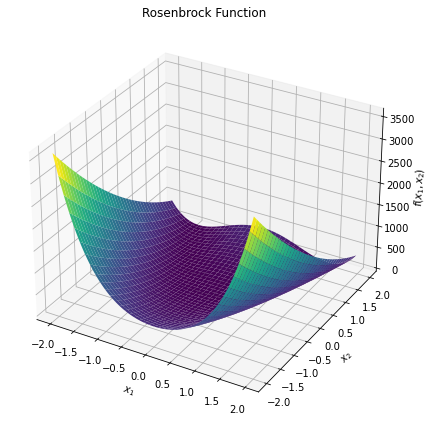

In [4]:
#Plotting the Rosenbrock Function
x = np.arange(-2, 2, 0.025)
y = np.arange(-2, 2, 0.025)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
mesh_size = range(len(X))
for i, j in product(mesh_size, mesh_size):
    x_coor = X[i][j]
    y_coor = Y[i][j]
    Z[i][j] = ros_func(np.array([x_coor, y_coor]))

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.set_title('Rosenbrock Function')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.tight_layout()
plt.show()

ros_func: objective function, ros_func_grad: gradient of Rosenbrock function, init: initial value [-1.2,1], tk: steplength, tol: tolerance of the ros_func_grad, max_iter: number of iterations.

In [5]:
def GradientDescent(ros_func, ros_func_grad, init, tk=1, tol=1e-3, max_iter=100000):
    xk = init    
    fk = ros_func(xk)
    grad_ros_func_xk = ros_func_grad(xk)
    gfk_norm = np.linalg.norm(grad_ros_func_xk)
    gfk_norm_x0 = np.linalg.norm(ros_func_grad(x0))

    num_iter = 0
    curve_x = [xk]
    curve_y = [fk]
    print('Initial condition: y = {:.4f}, x = {} \n'.format(fk, xk))
    # take steps
    while gfk_norm > tol and num_iter < max_iter:
        
        # determine direction
        dk = -grad_ros_func_xk #- np.linalg.inv(ros_func_hess(x,y)) @ ros_func_grad(x,y)

        # calculate new x, f(x), and f'(x)
        tk, fk = ArmijoLineSearch(ros_func, xk, dk, grad_ros_func_xk, fk, tk1=tk)
        xk = xk + tk * dk
        grad_ros_func_xk = ros_func_grad(xk)
        gfk_norm = np.linalg.norm(grad_ros_func_xk)

        # increase number of steps by 1, save new x and f(x)
        num_iter += 1
        curve_x.append(xk)
        curve_y.append(fk)
        print('Iteration: {} \t y = {:.4f}, x = {}, gradient = {:.4f}'.
              format(num_iter, fk, xk, gfk_norm))
    # print results
    if num_iter == max_iter:
        print('\n No Convergence.')
    else:
        print('\nSolution: \t y = {:.4f}, x = {}'.format(fk, xk))
    
    return np.array(curve_x), np.array(curve_y)

In [6]:
def plot(xs, ys):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.suptitle('Armijo line search')

    ax1.plot(xs[:,0], xs[:,1], linestyle='--', marker='o', color='orange')
    ax1.plot(xs[-1,0], xs[-1,1], 'ro')
    ax1.set(
        title='Optimization Process',
        xlabel='x1',
        ylabel='x2'
    )
    CS = ax1.contour(X, Y, Z)
    ax1.clabel(CS, fontsize='smaller', fmt='%1.2f')
    ax1.axis('square')

    ax2.plot(ys, linestyle='--', marker='o', color='orange')
    ax2.plot(len(ys)-1, ys[-1], 'ro')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.set(
        title='Function value during optimization process',
        xlabel='Number of Iterations',
        ylabel='Function Value'
    )
    ax2.legend(['Armijo line search algorithm'])

    plt.tight_layout()
    plt.show()

Initial condition: y = 24.2000, x = [-1.2  1. ] 

Iteration: 1 	 y = 5.1011, x = [-0.98945312  1.0859375 ], gradient = 43.8985
Iteration: 2 	 y = 4.1194, x = [-1.02689261  1.06505468], gradient = 2.1275
Iteration: 3 	 y = 4.1157, x = [-1.02716425  1.06299487], gradient = 1.7746
Iteration: 4 	 y = 4.1126, x = [-1.02638613  1.06144634], gradient = 1.7749
Iteration: 5 	 y = 4.1095, x = [-1.02562692  1.05988817], gradient = 1.7753
Iteration: 6 	 y = 4.1065, x = [-1.02486672  1.05833005], gradient = 1.7757
Iteration: 7 	 y = 4.1034, x = [-1.0241059   1.05677179], gradient = 1.7761
Iteration: 8 	 y = 4.1003, x = [-1.02334446  1.05521342], gradient = 1.7765
Iteration: 9 	 y = 4.0972, x = [-1.02258239  1.05365491], gradient = 1.7769
Iteration: 10 	 y = 4.0941, x = [-1.02181968  1.05209629], gradient = 1.7773
Iteration: 11 	 y = 4.0910, x = [-1.02105635  1.05053753], gradient = 1.7777
Iteration: 12 	 y = 4.0880, x = [-1.02029238  1.04897865], gradient = 1.7781
Iteration: 13 	 y = 4.0849, x = [-

Iteration: 1282 	 y = 0.2517, x = [0.49897285 0.24646186], gradient = 0.7093
Iteration: 1283 	 y = 0.2512, x = [0.49946179 0.2469525 ], gradient = 0.7083
Iteration: 1284 	 y = 0.2507, x = [0.49994978 0.24744265], gradient = 0.7072
Iteration: 1285 	 y = 0.2502, x = [0.50043682 0.24793232], gradient = 0.7062
Iteration: 1286 	 y = 0.2497, x = [0.5009229  0.24842152], gradient = 0.7052
Iteration: 1287 	 y = 0.2492, x = [0.50140804 0.24891024], gradient = 0.7041
Iteration: 1288 	 y = 0.2487, x = [0.50189224 0.24939848], gradient = 0.7031
Iteration: 1289 	 y = 0.2483, x = [0.5023755  0.24988624], gradient = 0.7021
Iteration: 1290 	 y = 0.2478, x = [0.50285782 0.25037353], gradient = 0.7011
Iteration: 1291 	 y = 0.2473, x = [0.50333921 0.25086034], gradient = 0.7000
Iteration: 1292 	 y = 0.2468, x = [0.50381967 0.25134667], gradient = 0.6990
Iteration: 1293 	 y = 0.2463, x = [0.5042992  0.25183253], gradient = 0.6980
Iteration: 1294 	 y = 0.2459, x = [0.50477781 0.25231791], gradient = 0.6970

Iteration: 2065 	 y = 0.0766, x = [0.72357933 0.52227268], gradient = 0.3143
Iteration: 2066 	 y = 0.0765, x = [0.72375336 0.52252548], gradient = 0.3140
Iteration: 2067 	 y = 0.0764, x = [0.72392723 0.52277811], gradient = 0.3138
Iteration: 2068 	 y = 0.0763, x = [0.72410093 0.52303056], gradient = 0.3135
Iteration: 2069 	 y = 0.0762, x = [0.72427446 0.52328282], gradient = 0.3133
Iteration: 2070 	 y = 0.0761, x = [0.72444783 0.52353491], gradient = 0.3130
Iteration: 2071 	 y = 0.0760, x = [0.72462104 0.52378681], gradient = 0.3128
Iteration: 2072 	 y = 0.0759, x = [0.72479407 0.52403854], gradient = 0.3125
Iteration: 2073 	 y = 0.0758, x = [0.72496695 0.52429008], gradient = 0.3123
Iteration: 2074 	 y = 0.0757, x = [0.72513966 0.52454145], gradient = 0.3121
Iteration: 2075 	 y = 0.0756, x = [0.7253122  0.52479264], gradient = 0.3118
Iteration: 2076 	 y = 0.0755, x = [0.72548459 0.52504364], gradient = 0.3116
Iteration: 2077 	 y = 0.0754, x = [0.7256568  0.52529447], gradient = 0.3113

Iteration: 3088 	 y = 0.0245, x = [0.8437185  0.71117497], gradient = 0.1593
Iteration: 3089 	 y = 0.0244, x = [0.84379767 0.71130894], gradient = 0.1593
Iteration: 3090 	 y = 0.0244, x = [0.84387678 0.71144284], gradient = 0.1592
Iteration: 3091 	 y = 0.0244, x = [0.84395585 0.71157666], gradient = 0.1591
Iteration: 3092 	 y = 0.0244, x = [0.84403486 0.71171042], gradient = 0.1590
Iteration: 3093 	 y = 0.0243, x = [0.84411382 0.71184409], gradient = 0.1589
Iteration: 3094 	 y = 0.0243, x = [0.84419273 0.7119777 ], gradient = 0.1588
Iteration: 3095 	 y = 0.0243, x = [0.84427159 0.71211123], gradient = 0.1587
Iteration: 3096 	 y = 0.0243, x = [0.8443504  0.71224468], gradient = 0.1586
Iteration: 3097 	 y = 0.0242, x = [0.84442916 0.71237807], gradient = 0.1585
Iteration: 3098 	 y = 0.0242, x = [0.84450787 0.71251138], gradient = 0.1584
Iteration: 3099 	 y = 0.0242, x = [0.84458653 0.71264461], gradient = 0.1583
Iteration: 3100 	 y = 0.0242, x = [0.84466514 0.71277778], gradient = 0.1583

Iteration: 4098 	 y = 0.0093, x = [0.9036518  0.81617818], gradient = 0.0933
Iteration: 4099 	 y = 0.0093, x = [0.90369582 0.81625794], gradient = 0.0932
Iteration: 4100 	 y = 0.0093, x = [0.90373982 0.81633767], gradient = 0.0932
Iteration: 4101 	 y = 0.0093, x = [0.9037838  0.81641735], gradient = 0.0932
Iteration: 4102 	 y = 0.0093, x = [0.90382775 0.816497  ], gradient = 0.0931
Iteration: 4103 	 y = 0.0093, x = [0.90387168 0.81657661], gradient = 0.0931
Iteration: 4104 	 y = 0.0092, x = [0.90391559 0.81665618], gradient = 0.0930
Iteration: 4105 	 y = 0.0092, x = [0.90395947 0.81673571], gradient = 0.0930
Iteration: 4106 	 y = 0.0092, x = [0.90400333 0.81681521], gradient = 0.0929
Iteration: 4107 	 y = 0.0092, x = [0.90404717 0.81689466], gradient = 0.0929
Iteration: 4108 	 y = 0.0092, x = [0.90409098 0.81697408], gradient = 0.0928
Iteration: 4109 	 y = 0.0092, x = [0.90413477 0.81705346], gradient = 0.0928
Iteration: 4110 	 y = 0.0092, x = [0.90417854 0.8171328 ], gradient = 0.0927

Iteration: 5151 	 y = 0.0037, x = [0.93953031 0.88246629], gradient = 0.0568
Iteration: 5152 	 y = 0.0037, x = [0.93955633 0.8825153 ], gradient = 0.0568
Iteration: 5153 	 y = 0.0037, x = [0.93958234 0.88256428], gradient = 0.0568
Iteration: 5154 	 y = 0.0037, x = [0.93960833 0.88261325], gradient = 0.0567
Iteration: 5155 	 y = 0.0037, x = [0.93963432 0.88266219], gradient = 0.0567
Iteration: 5156 	 y = 0.0036, x = [0.93966029 0.8827111 ], gradient = 0.0567
Iteration: 5157 	 y = 0.0036, x = [0.93968625 0.88276   ], gradient = 0.0567
Iteration: 5158 	 y = 0.0036, x = [0.93971219 0.88280888], gradient = 0.0566
Iteration: 5159 	 y = 0.0036, x = [0.93973813 0.88285773], gradient = 0.0566
Iteration: 5160 	 y = 0.0036, x = [0.93976405 0.88290656], gradient = 0.0566
Iteration: 5161 	 y = 0.0036, x = [0.93978996 0.88295537], gradient = 0.0566
Iteration: 5162 	 y = 0.0036, x = [0.93981585 0.88300416], gradient = 0.0565
Iteration: 5163 	 y = 0.0036, x = [0.93984174 0.88305292], gradient = 0.0565

Iteration: 6185 	 y = 0.0015, x = [0.96092544 0.92321764], gradient = 0.0361
Iteration: 6186 	 y = 0.0015, x = [0.96094168 0.9232489 ], gradient = 0.0361
Iteration: 6187 	 y = 0.0015, x = [0.9609579  0.92328015], gradient = 0.0360
Iteration: 6188 	 y = 0.0015, x = [0.96097412 0.92331139], gradient = 0.0360
Iteration: 6189 	 y = 0.0015, x = [0.96099033 0.92334261], gradient = 0.0360
Iteration: 6190 	 y = 0.0015, x = [0.96100653 0.92337382], gradient = 0.0360
Iteration: 6191 	 y = 0.0015, x = [0.96102273 0.92340502], gradient = 0.0360
Iteration: 6192 	 y = 0.0015, x = [0.96103892 0.92343621], gradient = 0.0360
Iteration: 6193 	 y = 0.0015, x = [0.9610551  0.92346738], gradient = 0.0359
Iteration: 6194 	 y = 0.0015, x = [0.96107128 0.92349854], gradient = 0.0359
Iteration: 6195 	 y = 0.0015, x = [0.96108744 0.92352968], gradient = 0.0359
Iteration: 6196 	 y = 0.0015, x = [0.9611036  0.92356081], gradient = 0.0359
Iteration: 6197 	 y = 0.0015, x = [0.96111976 0.92359193], gradient = 0.0359

Iteration: 7319 	 y = 0.0006, x = [0.9754608  0.95142413], gradient = 0.0224
Iteration: 7320 	 y = 0.0006, x = [0.97547076 0.95144359], gradient = 0.0224
Iteration: 7321 	 y = 0.0006, x = [0.97548071 0.95146305], gradient = 0.0224
Iteration: 7322 	 y = 0.0006, x = [0.97549066 0.95148249], gradient = 0.0224
Iteration: 7323 	 y = 0.0006, x = [0.9755006  0.95150193], gradient = 0.0223
Iteration: 7324 	 y = 0.0006, x = [0.97551054 0.95152137], gradient = 0.0223
Iteration: 7325 	 y = 0.0006, x = [0.97552048 0.95154079], gradient = 0.0223
Iteration: 7326 	 y = 0.0006, x = [0.97553041 0.9515602 ], gradient = 0.0223
Iteration: 7327 	 y = 0.0006, x = [0.97554033 0.95157961], gradient = 0.0223
Iteration: 7328 	 y = 0.0006, x = [0.97555025 0.95159901], gradient = 0.0223
Iteration: 7329 	 y = 0.0006, x = [0.97556017 0.9516184 ], gradient = 0.0223
Iteration: 7330 	 y = 0.0006, x = [0.97557009 0.95163779], gradient = 0.0223
Iteration: 7331 	 y = 0.0006, x = [0.97558    0.95165716], gradient = 0.0223

Iteration: 8463 	 y = 0.0002, x = [0.98451767 0.96921251], gradient = 0.0140
Iteration: 8464 	 y = 0.0002, x = [0.98452386 0.96922473], gradient = 0.0140
Iteration: 8465 	 y = 0.0002, x = [0.98453005 0.96923694], gradient = 0.0140
Iteration: 8466 	 y = 0.0002, x = [0.98453623 0.96924914], gradient = 0.0140
Iteration: 8467 	 y = 0.0002, x = [0.98454242 0.96926134], gradient = 0.0140
Iteration: 8468 	 y = 0.0002, x = [0.9845486  0.96927353], gradient = 0.0140
Iteration: 8469 	 y = 0.0002, x = [0.98455477 0.96928572], gradient = 0.0140
Iteration: 8470 	 y = 0.0002, x = [0.98456095 0.96929791], gradient = 0.0140
Iteration: 8471 	 y = 0.0002, x = [0.98456712 0.96931008], gradient = 0.0140
Iteration: 8472 	 y = 0.0002, x = [0.98457329 0.96932226], gradient = 0.0140
Iteration: 8473 	 y = 0.0002, x = [0.98457946 0.96933443], gradient = 0.0140
Iteration: 8474 	 y = 0.0002, x = [0.98458562 0.96934659], gradient = 0.0140
Iteration: 8475 	 y = 0.0002, x = [0.98459179 0.96935875], gradient = 0.0140

Iteration: 9651 	 y = 0.0001, x = [0.99034931 0.9807529 ], gradient = 0.0087
Iteration: 9652 	 y = 0.0001, x = [0.99035313 0.98076049], gradient = 0.0087
Iteration: 9653 	 y = 0.0001, x = [0.99035695 0.98076807], gradient = 0.0087
Iteration: 9654 	 y = 0.0001, x = [0.99036077 0.98077565], gradient = 0.0087
Iteration: 9655 	 y = 0.0001, x = [0.99036459 0.98078323], gradient = 0.0087
Iteration: 9656 	 y = 0.0001, x = [0.9903684  0.98079081], gradient = 0.0087
Iteration: 9657 	 y = 0.0001, x = [0.99037222 0.98079838], gradient = 0.0087
Iteration: 9658 	 y = 0.0001, x = [0.99037603 0.98080595], gradient = 0.0087
Iteration: 9659 	 y = 0.0001, x = [0.99037984 0.98081351], gradient = 0.0087
Iteration: 9660 	 y = 0.0001, x = [0.99038365 0.98082107], gradient = 0.0087
Iteration: 9661 	 y = 0.0001, x = [0.99038746 0.98082863], gradient = 0.0087
Iteration: 9662 	 y = 0.0001, x = [0.99039127 0.98083619], gradient = 0.0087
Iteration: 9663 	 y = 0.0001, x = [0.99039507 0.98084374], gradient = 0.0087

Iteration: 10491 	 y = 0.0000, x = [0.99307576 0.98617165], gradient = 0.0062
Iteration: 10492 	 y = 0.0000, x = [0.9930785  0.98617709], gradient = 0.0062
Iteration: 10493 	 y = 0.0000, x = [0.99308122 0.98618252], gradient = 0.0062
Iteration: 10494 	 y = 0.0000, x = [0.99308395 0.98618795], gradient = 0.0062
Iteration: 10495 	 y = 0.0000, x = [0.99308668 0.98619338], gradient = 0.0062
Iteration: 10496 	 y = 0.0000, x = [0.99308941 0.9861988 ], gradient = 0.0062
Iteration: 10497 	 y = 0.0000, x = [0.99309213 0.98620422], gradient = 0.0062
Iteration: 10498 	 y = 0.0000, x = [0.99309486 0.98620965], gradient = 0.0062
Iteration: 10499 	 y = 0.0000, x = [0.99309758 0.98621507], gradient = 0.0062
Iteration: 10500 	 y = 0.0000, x = [0.9931003  0.98622048], gradient = 0.0062
Iteration: 10501 	 y = 0.0000, x = [0.99310302 0.9862259 ], gradient = 0.0062
Iteration: 10502 	 y = 0.0000, x = [0.99310574 0.98623131], gradient = 0.0062
Iteration: 10503 	 y = 0.0000, x = [0.99310846 0.98623672], grad

Iteration: 11767 	 y = 0.0000, x = [0.99580902 0.99161879], gradient = 0.0038
Iteration: 11768 	 y = 0.0000, x = [0.99581066 0.99162207], gradient = 0.0038
Iteration: 11769 	 y = 0.0000, x = [0.99581231 0.99162535], gradient = 0.0038
Iteration: 11770 	 y = 0.0000, x = [0.99581395 0.99162863], gradient = 0.0038
Iteration: 11771 	 y = 0.0000, x = [0.9958156  0.99163191], gradient = 0.0038
Iteration: 11772 	 y = 0.0000, x = [0.99581724 0.99163519], gradient = 0.0038
Iteration: 11773 	 y = 0.0000, x = [0.99581888 0.99163847], gradient = 0.0038
Iteration: 11774 	 y = 0.0000, x = [0.99582052 0.99164175], gradient = 0.0038
Iteration: 11775 	 y = 0.0000, x = [0.99582216 0.99164502], gradient = 0.0037
Iteration: 11776 	 y = 0.0000, x = [0.9958238  0.99164829], gradient = 0.0037
Iteration: 11777 	 y = 0.0000, x = [0.99582544 0.99165157], gradient = 0.0037
Iteration: 11778 	 y = 0.0000, x = [0.99582708 0.99165484], gradient = 0.0037
Iteration: 11779 	 y = 0.0000, x = [0.99582872 0.99165811], grad

Iteration: 12846 	 y = 0.0000, x = [0.99725512 0.99450678], gradient = 0.0025
Iteration: 12847 	 y = 0.0000, x = [0.9972562  0.99450893], gradient = 0.0025
Iteration: 12848 	 y = 0.0000, x = [0.99725727 0.99451108], gradient = 0.0025
Iteration: 12849 	 y = 0.0000, x = [0.99725835 0.99451322], gradient = 0.0025
Iteration: 12850 	 y = 0.0000, x = [0.99725942 0.99451537], gradient = 0.0025
Iteration: 12851 	 y = 0.0000, x = [0.9972605  0.99451752], gradient = 0.0025
Iteration: 12852 	 y = 0.0000, x = [0.99726157 0.99451966], gradient = 0.0025
Iteration: 12853 	 y = 0.0000, x = [0.99726264 0.9945218 ], gradient = 0.0025
Iteration: 12854 	 y = 0.0000, x = [0.99726371 0.99452395], gradient = 0.0025
Iteration: 12855 	 y = 0.0000, x = [0.99726479 0.99452609], gradient = 0.0025
Iteration: 12856 	 y = 0.0000, x = [0.99726586 0.99452823], gradient = 0.0025
Iteration: 12857 	 y = 0.0000, x = [0.99726693 0.99453037], gradient = 0.0024
Iteration: 12858 	 y = 0.0000, x = [0.997268   0.99453251], grad

Iteration: 13910 	 y = 0.0000, x = [0.99819023 0.99637648], gradient = 0.0016
Iteration: 13911 	 y = 0.0000, x = [0.99819093 0.99637789], gradient = 0.0016
Iteration: 13912 	 y = 0.0000, x = [0.99819164 0.99637931], gradient = 0.0016
Iteration: 13913 	 y = 0.0000, x = [0.99819235 0.99638072], gradient = 0.0016
Iteration: 13914 	 y = 0.0000, x = [0.99819306 0.99638214], gradient = 0.0016
Iteration: 13915 	 y = 0.0000, x = [0.99819376 0.99638355], gradient = 0.0016
Iteration: 13916 	 y = 0.0000, x = [0.99819447 0.99638497], gradient = 0.0016
Iteration: 13917 	 y = 0.0000, x = [0.99819518 0.99638638], gradient = 0.0016
Iteration: 13918 	 y = 0.0000, x = [0.99819588 0.99638779], gradient = 0.0016
Iteration: 13919 	 y = 0.0000, x = [0.99819659 0.9963892 ], gradient = 0.0016
Iteration: 13920 	 y = 0.0000, x = [0.99819729 0.99639061], gradient = 0.0016
Iteration: 13921 	 y = 0.0000, x = [0.998198   0.99639202], gradient = 0.0016
Iteration: 13922 	 y = 0.0000, x = [0.9981987  0.99639343], grad

Iteration: 14931 	 y = 0.0000, x = [0.99878592 0.99756846], gradient = 0.0011
Iteration: 14932 	 y = 0.0000, x = [0.9987864  0.99756941], gradient = 0.0011
Iteration: 14933 	 y = 0.0000, x = [0.99878687 0.99757036], gradient = 0.0011
Iteration: 14934 	 y = 0.0000, x = [0.99878735 0.99757131], gradient = 0.0011
Iteration: 14935 	 y = 0.0000, x = [0.99878782 0.99757226], gradient = 0.0011
Iteration: 14936 	 y = 0.0000, x = [0.9987883  0.99757321], gradient = 0.0011
Iteration: 14937 	 y = 0.0000, x = [0.99878877 0.99757415], gradient = 0.0011
Iteration: 14938 	 y = 0.0000, x = [0.99878924 0.9975751 ], gradient = 0.0011
Iteration: 14939 	 y = 0.0000, x = [0.99878971 0.99757605], gradient = 0.0011
Iteration: 14940 	 y = 0.0000, x = [0.99879019 0.99757699], gradient = 0.0011
Iteration: 14941 	 y = 0.0000, x = [0.99879066 0.99757794], gradient = 0.0011
Iteration: 14942 	 y = 0.0000, x = [0.99879113 0.99757889], gradient = 0.0011
Iteration: 14943 	 y = 0.0000, x = [0.99879161 0.99757983], grad

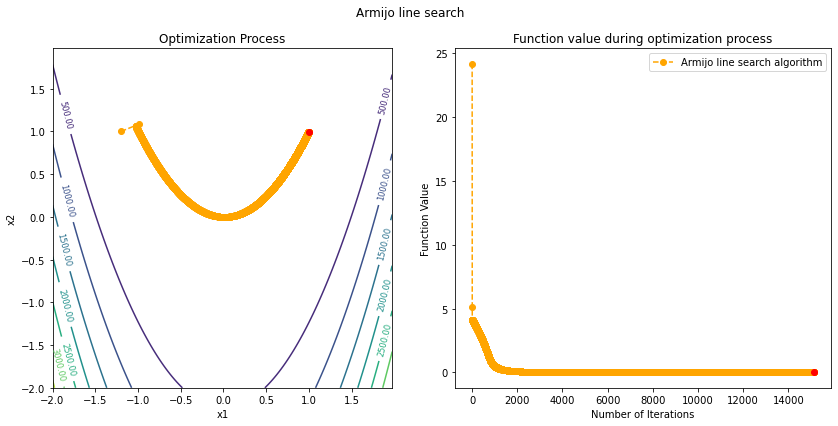

In [7]:
x0 = np.array([-1.2, 1])
xs, ys = GradientDescent(ros_func, ros_func_grad, init=x0)
plot(xs, ys)